In [12]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
from collections import Counter
from timeit import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
# Load in the data set as required
df = pd.read_csv('C:/Users/chake/Desktop/dga-24000.csv')
df

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign
...,...,...
23995,fhyibfwhpahb.su,locky
23996,nlgusntqeqixnqyo.org,locky
23997,awwduqqrjxttmn.su,locky
23998,ccxmwif.pl,locky


In [3]:
# Count how many entries exist for each malware family (plus the benign class)
df.value_counts('Family')

Family
banjori     1000
benign      1000
tinba       1000
symmi       1000
suppobox    1000
            ... 
locky       1000
gameover    1000
flubot      1000
emotet      1000
virut       1000
Name: count, Length: 24, dtype: int64

In [4]:
# Rename columns
df = df.rename(columns={'Domain': 'domain', 'Family': 'family'})

This was done to have more readable and uniform column names, which is important for data analysis and modeling. The lowercase column names are also easier to work with as they don't require special attention to capitalisation.

In [5]:
# Use LabelEncoder to convert family names to numerical labels
le = LabelEncoder()
y = le.fit_transform(df['family'])

LabelEncoder() is used to encode the string labels of the family column into numerical labels. This is done because most machine learning algorithms require numeric input data, rather than string data.

fit_transform() is a method of the LabelEncoder object that learns and transforms the input data, in this case the family column of the dataframe df. This means that the LabelEncoder learns the unique labels in the family column and then replaces each label with a unique integer. The resulting encoded labels are then stored in the y variable.

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['domain'], y, test_size=0.3, random_state=42)

The data is split into training and testing sets using the train_test_split function from Scikit-learn's model_selection module. The df['domain'] column represents the input feature data, and y represents the target output data. The test_size parameter is set to 0.3, meaning that 30% of the data will be used for testing, and the remaining 70% will be used for training. The random_state parameter is set to 42 to ensure that the same random split is generated each time the code is run, which is useful for reproducibility. The resulting training and testing sets are assigned to X_train, X_test, y_train, and y_test, respectively.

In [7]:
# Feature extraction
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,4))

X_train_counts = vectorizer.fit_transform(X_train)

def run_classifier(clf):
    # Train model
    clf.fit(X_train_counts, y_train)

    # Evaluate model
    X_test_counts = vectorizer.transform(X_test)

    y_pred = clf.predict(X_test_counts)

    # Print performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, matrix

run_classifier takes a classifier object as input and trains and evaluates it on the data. The input classifier object should have the fit and predict methods implemented, which is the case for many classifiers in scikit-learn.

The function first trains the classifier on the training data X_train_counts and y_train, which are the result of applying the CountVectorizer with character n-gram range (2,4) on the training set of domain names X_train.

It then evaluates the trained classifier on the test data X_test_counts, which is the result of applying the same CountVectorizer on the test set of domain names X_test.

The function calculates and returns the accuracy, classification report, and confusion matrix of the predictions made by the classifier on the test set.

In [8]:
# Run Logistic Regression classifier
lr = LogisticRegression(random_state=42, max_iter=1000)
lr_acc, lr_report, lr_matrix = run_classifier(lr)
print('Logistic Regression Accuracy:', lr_acc)
print('Logistic Regression Classification Report:')
print(lr_report)

Logistic Regression Accuracy: 0.8329166666666666
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.79      0.82      0.81       280
           2       0.97      0.97      0.97       294
           3       0.64      0.63      0.63       303
           4       0.97      0.77      0.86       324
           5       0.70      0.51      0.59       315
           6       0.78      0.81      0.80       316
           7       0.96      1.00      0.98       307
           8       0.91      1.00      0.95       302
           9       0.88      0.71      0.78       300
          10       1.00      0.96      0.98       316
          11       0.98      0.95      0.96       297
          12       0.96      0.97      0.96       290
          13       0.63      0.45      0.52       303
          14       0.44      0.61      0.51       277
          15       0.76      0.70      0.73

The accuracy score achieved by the model is 0.833, which means that it correctly classified 83.3% of the domains in the test set. The classification report shows the precision, recall, and f1-score for each class in the target variable. The confusion matrix shows the actual vs. predicted counts for each class. Looking at the precision values, we can see that the model performs very well on some classes such as class 0, where it correctly classified all the samples. However, the precision values are lower for some other classes, such as class 14, where it only correctly classified 44% of the samples.

Overall, the performance of the model seems to be decent, but there is room for improvement.

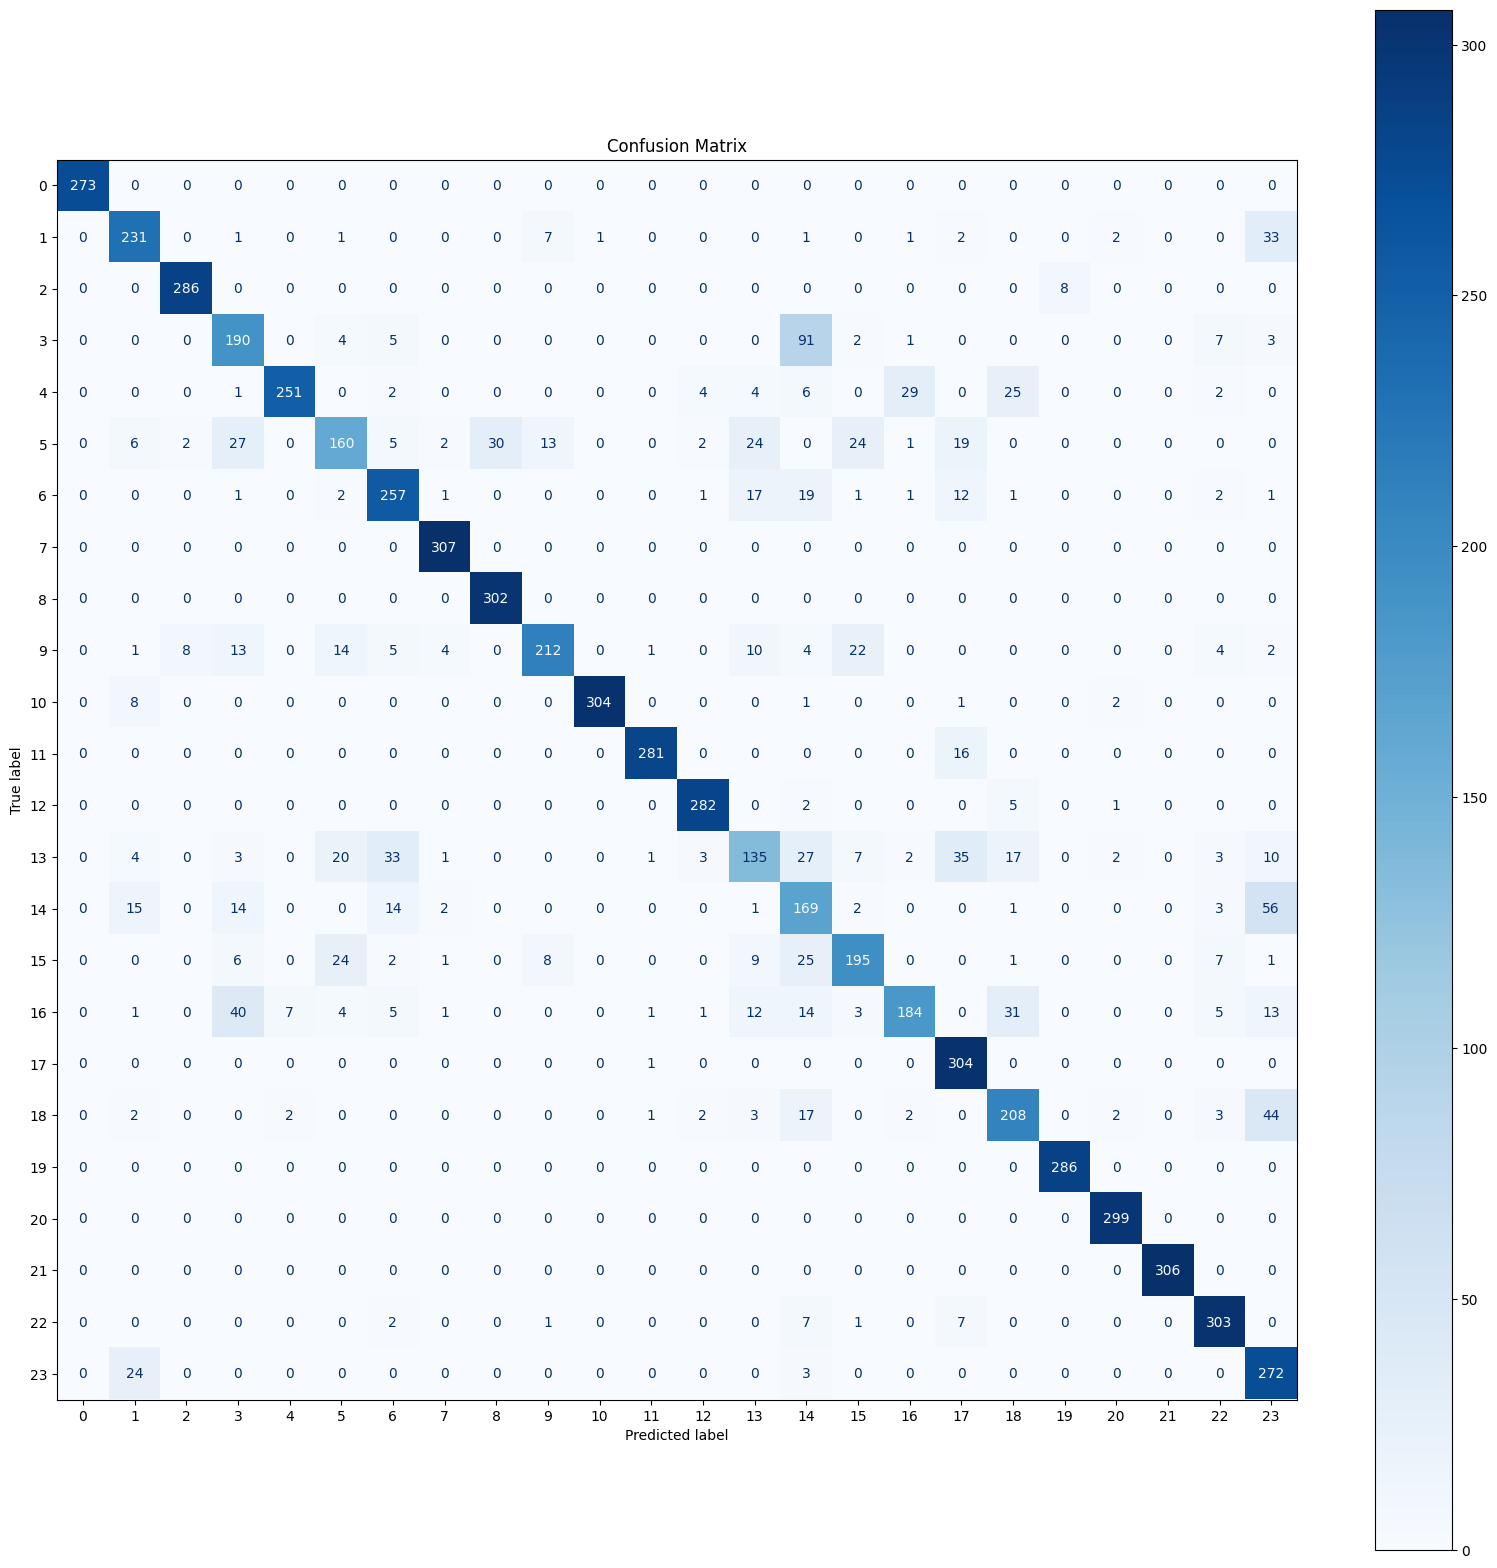

In [13]:
# Display confusion matrix for Logistic Regression classifier
fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=lr_matrix, display_labels=lr.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.show()

In [14]:
# Run Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_acc, rf_report, rf_matrix = run_classifier(rf)
print('Random Forest Accuracy:', rf_acc)
print('Random Forest Classification Report:')
print(rf_report)

Random Forest Accuracy: 0.6581944444444444
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.38      0.70      0.49       280
           2       0.98      0.73      0.84       294
           3       0.45      0.63      0.53       303
           4       0.94      0.51      0.66       324
           5       0.67      0.54      0.59       315
           6       0.53      0.18      0.27       316
           7       0.84      0.87      0.85       307
           8       0.91      1.00      0.95       302
           9       0.92      0.66      0.77       300
          10       1.00      0.86      0.93       316
          11       0.85      0.91      0.88       297
          12       0.81      0.63      0.71       290
          13       0.55      0.17      0.26       303
          14       0.35      0.18      0.24       277
          15       0.72      0.34      0.46       279
 

The random forest classifier achieved an accuracy of 0.658, which is not very high. Looking at the classification report, we can see that the precision and recall values for each class vary greatly, indicating that the classifier is not performing well for all classes. In particular, some classes have very low precision and recall values, such as classes 6, 13, and 14. This suggests that the classifier is struggling to correctly identify these classes.

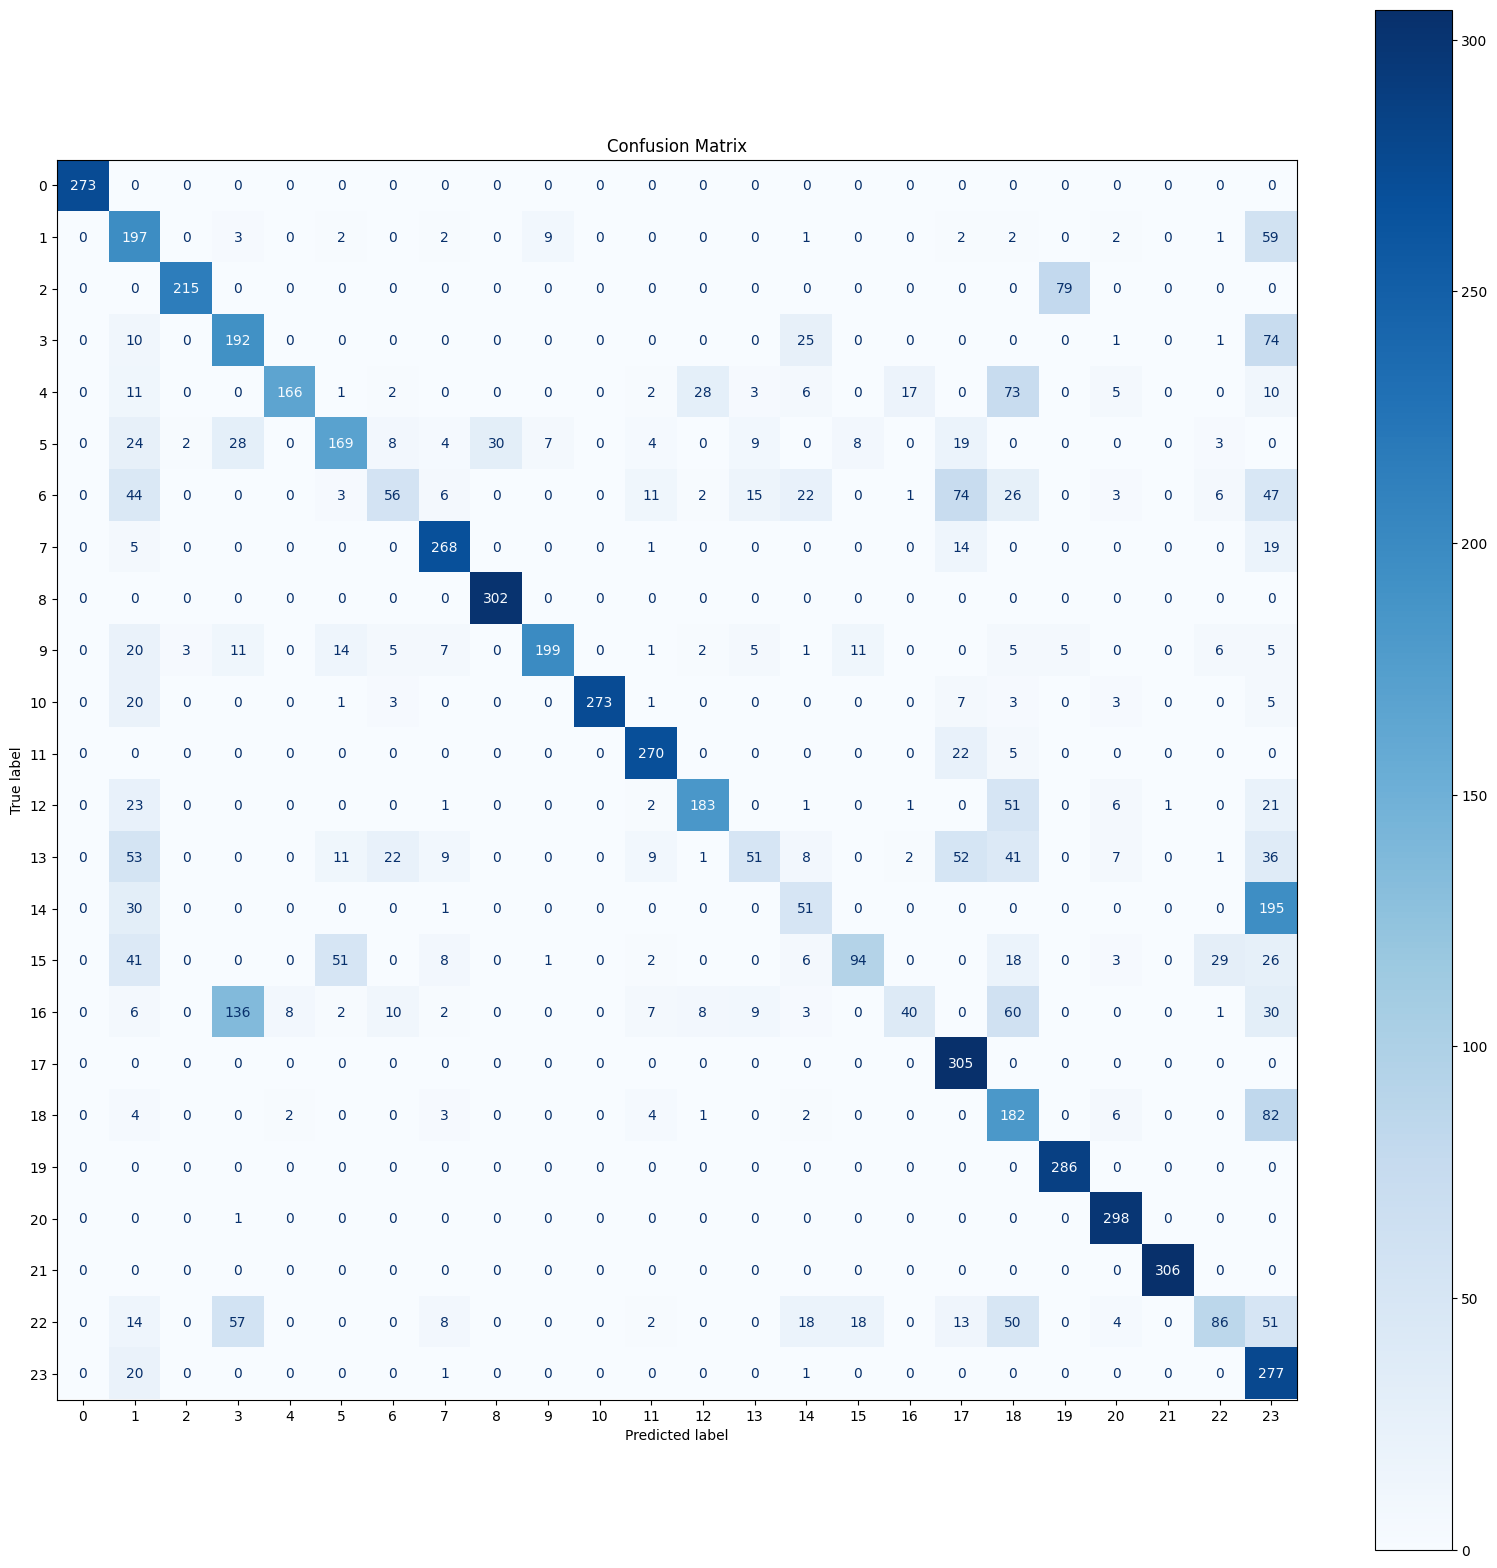

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix, display_labels=rf.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.show()

# Reset the pandas display options to the defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [16]:
# Run Multi-Layer Perceptron classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1200, random_state=42)
mlp_acc, mlp_report, mlp_matrix = run_classifier(mlp)
print('MLP Accuracy:', mlp_acc)
print('MLP Classification Report:')
print(mlp_report)

MLP Accuracy: 0.8040277777777778
MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.62      0.91      0.74       280
           2       0.97      0.97      0.97       294
           3       0.59      0.64      0.61       303
           4       0.95      0.70      0.81       324
           5       0.62      0.51      0.56       315
           6       0.73      0.80      0.76       316
           7       0.97      1.00      0.98       307
           8       0.91      0.98      0.95       302
           9       0.79      0.63      0.70       300
          10       0.98      0.97      0.97       316
          11       0.98      0.93      0.96       297
          12       0.96      0.96      0.96       290
          13       0.51      0.40      0.45       303
          14       0.54      0.52      0.53       277
          15       0.58      0.53      0.55       279
          16       0.

The Multi-Layer Perceptron classifier achieved an accuracy of 0.804 on the test set. Looking at the classification report, we can see that the precision, recall, and F1-score vary across the different classes. Some classes have high precision, meaning that the classifier rarely misclassifies those samples, but lower recall, meaning that the classifier misses some samples from those classes. Other classes have high recall, meaning that the classifier rarely misses samples from those classes, but lower precision, meaning that it sometimes misclassifies samples from other classes as belonging to those classes. Overall, the weighted average precision, recall, and F1-score are around 0.81, indicating that the classifier performs reasonably well across all classes.

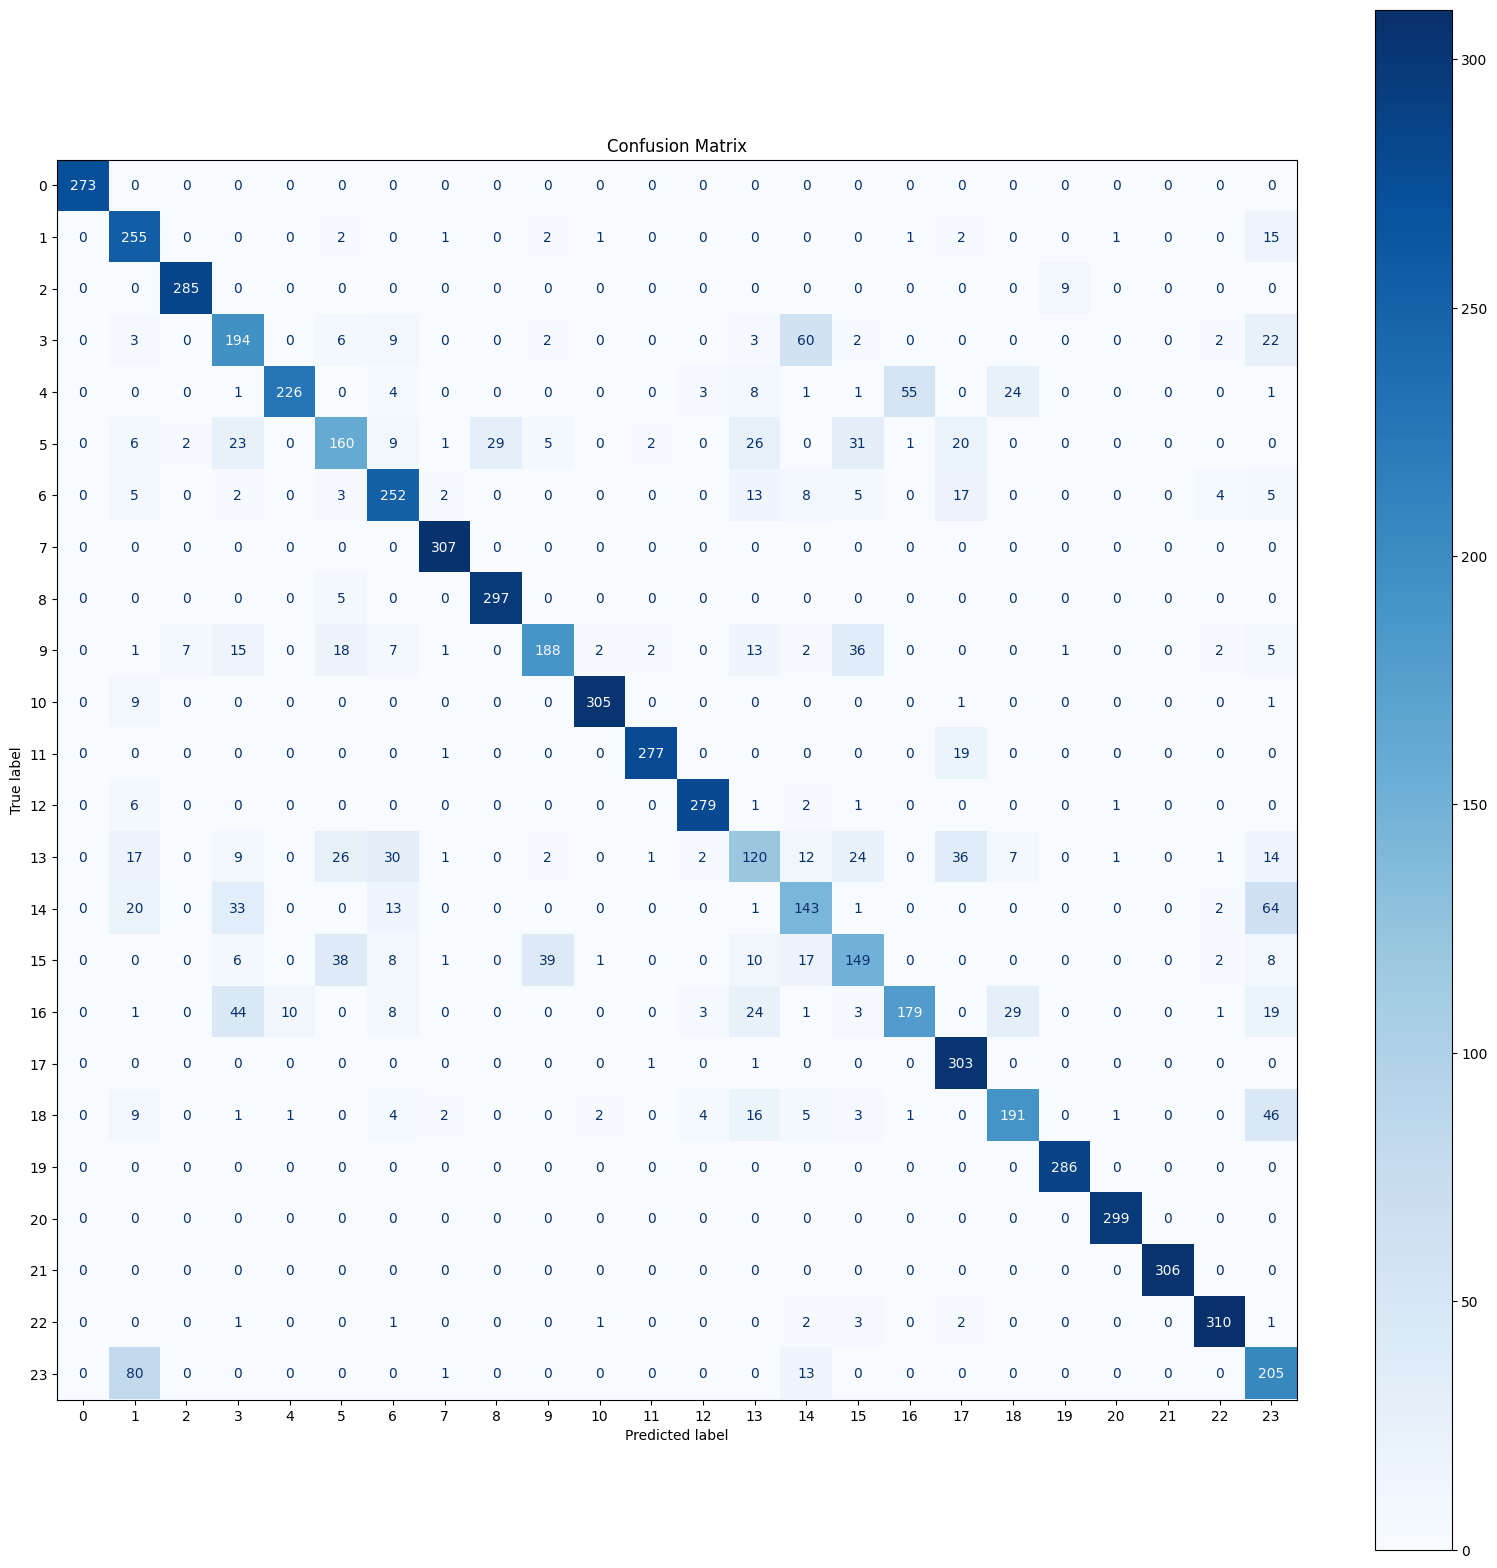

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_matrix, display_labels=mlp.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.show()

# Reset the pandas display options to the defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Based on the accuracy scores, the Logistic Regression classifier outperformed the other two classifiers with an accuracy of 0.833. The Random Forest classifier had an accuracy of 0.658, which was the lowest among the three classifiers. The MLP classifier performed better than the Random Forest classifier with an accuracy of 0.804, but it still fell short of the Logistic Regression classifier's performance. Additionally, the Logistic Regression classifier had the highest precision, recall, and F1-score values among the three classifiers for most of the classes. Therefore, we can conclude that the Logistic Regression classifier is the best classifier for this case.

In detecting threats not only performance and accuracy matter, but speed of each classifier has a crucial impact. In our case, we tested three classifiers: Logistic Regression, Random Forest, and MLP.

Random Forest had the fastest training and prediction time among the classifiers. This is because Random Forest builds multiple decision trees and aggregates their outputs to make predictions, which can be done quickly in parallel. However, Random Forest had the lowest overall accuracy compared to the other two classifiers.

Logistic Regression had a relatively fast training and prediction time, which makes it a good choice for applications that require real-time predictions. It also had the highest overall accuracy among the classifiers.

MLP had the slowest training and prediction time, which can make it impractical for large datasets or applications that require real-time predictions. However, it had a good balance of accuracy and precision in detecting threats.

In the end, we could say for this type of application, Logistic Regression is the best classifier to use.